# 城市气候与海洋的关系研究

导入包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

导入数据各个海滨城市数据

In [2]:
data = pd.read_csv('./asti_250715.csv',index_col='Unnamed: 0')
data

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,28.79,54,1012,Sky is Clear,1437730850,3.10,70,Asti,2015-07-24 11:40:50,315
1,30.02,58,1012,Sky is Clear,1437734493,3.10,70,Asti,2015-07-24 12:41:33,315
2,30.79,49,1007,light rain,1437738045,2.06,24,Asti,2015-07-24 13:40:45,315
3,32.02,51,1011,few clouds,1437741579,4.10,10,Asti,2015-07-24 14:39:39,315
4,30.93,51,1011,few clouds,1437745188,2.60,120,Asti,2015-07-24 15:39:48,315
5,29.12,48,1009,light rain,1437748777,2.10,0,Asti,2015-07-24 16:39:37,315
6,29.10,58,1009,heavy intensity rain,1437752543,5.70,170,Asti,2015-07-24 17:42:23,315
7,29.04,54,1008,broken clouds,1437756041,1.00,0,Asti,2015-07-24 18:40:41,315
8,27.89,65,1008,scattered clouds,1437759569,1.00,0,Asti,2015-07-24 19:39:29,315
9,26.87,61,1008,Sky is Clear,1437763243,1.00,180,Asti,2015-07-24 20:40:43,315


In [3]:
import os

In [4]:
def getFiles(dir,suffix):
    res = []
    for root,dirs,files in os.walk(dir):
        for filename in files:
            name, suf = os.path.splitext(filename)
            if suf == suffix:
                res.append(os.path.join(root,filename))
    return res

In [66]:
csvs = getFiles('./','.csv')
len(csvs)

30

In [67]:
import re
import os

In [68]:
[file for file in os.listdir() if file.endswith('.csv')]

['asti_150715.csv',
 'asti_250715.csv',
 'asti_270615.csv',
 'bologna_150715.csv',
 'bologna_250715.csv',
 'bologna_270615.csv',
 'cesena_150715.csv',
 'cesena_250715.csv',
 'cesena_270615.csv',
 'faenza_150715.csv',
 'faenza_250715.csv',
 'faenza_270615.csv',
 'ferrara_150715.csv',
 'ferrara_250715.csv',
 'ferrara_270615.csv',
 'mantova_150715.csv',
 'mantova_250715.csv',
 'mantova_270615.csv',
 'milano_150715.csv',
 'milano_250715.csv',
 'milano_270615.csv',
 'piacenza_150715.csv',
 'piacenza_250715.csv',
 'piacenza_270615.csv',
 'ravenna_150715.csv',
 'ravenna_250715.csv',
 'ravenna_270615.csv',
 'torino_150715.csv',
 'torino_250715.csv',
 'torino_270615.csv']

In [70]:
[file for file in os.listdir() if re.match(r'^[a-z]+_\d{6}.csv$',file)]

['asti_150715.csv',
 'asti_250715.csv',
 'asti_270615.csv',
 'bologna_150715.csv',
 'bologna_250715.csv',
 'bologna_270615.csv',
 'cesena_150715.csv',
 'cesena_250715.csv',
 'cesena_270615.csv',
 'faenza_150715.csv',
 'faenza_250715.csv',
 'faenza_270615.csv',
 'ferrara_150715.csv',
 'ferrara_250715.csv',
 'ferrara_270615.csv',
 'mantova_150715.csv',
 'mantova_250715.csv',
 'mantova_270615.csv',
 'milano_150715.csv',
 'milano_250715.csv',
 'milano_270615.csv',
 'piacenza_150715.csv',
 'piacenza_250715.csv',
 'piacenza_270615.csv',
 'ravenna_150715.csv',
 'ravenna_250715.csv',
 'ravenna_270615.csv',
 'torino_150715.csv',
 'torino_250715.csv',
 'torino_270615.csv']

In [6]:
data_all = None
for csv_path in csvs:
    data = pd.read_csv(csv_path,index_col='Unnamed: 0')
    data_all = pd.concat((data_all,data))
data_all.reset_index(drop=True,inplace=True)

查看行数

In [7]:
data_all.shape[0]

675

去除没用的列

In [8]:
data_all.drop(columns='description')

,temp,humidity,pressure,dt,wind_speed,wind_deg,city,day,dist
0,28.05,66,1014.0,1436863176,2.57,42.501,Asti,2015-07-14 10:39:36,315
1,29.51,64,1014.0,1436866759,1.54,263.000,Asti,2015-07-14 11:39:19,315
2,30.39,58,1017.0,1436870510,2.60,100.000,Asti,2015-07-14 12:41:50,315
3,31.10,54,1017.0,1436874098,2.10,90.000,Asti,2015-07-14 13:41:38,315
4,33.23,45,1016.0,1436877645,2.10,120.000,Asti,2015-07-14 14:40:45,315
5,32.95,46,1016.0,1436881329,2.10,110.000,Asti,2015-07-14 15:42:09,315
6,34.31,46,1015.0,1436884929,2.10,100.000,Asti,2015-07-14 16:42:09,315
7,32.47,49,1015.0,1436888513,2.10,100.000,Asti,2015-07-14 17:41:53,315
8,34.28,46,1015.0,1436892132,1.50,100.000,Asti,2015-07-14 18:42:12,315
9,31.41,46,1014.0,1436895723,2.10,240.000,Asti,2015-07-14 19:42:03,315


各城市与海洋距离，最高温度，最低温度，最高湿度，最低湿度

In [9]:
citys = data_all.groupby(['city'])[['dist','temp','humidity']].min()
citys2 = data_all.groupby(['city'])[['temp','humidity']].max()

In [10]:
city_data = pd.merge(citys,citys2,on='city',suffixes=['_min','_max'])
city_data

,dist,temp_min,humidity_min,temp_max,humidity_max
city,,,,,
Asti,315,18.01,29,34.31,93
Bologna,71,18.44,40,33.85,92
Cesena,14,18.41,61,32.81,100
Faenza,37,18.62,61,32.74,100
Ferrara,47,18.81,39,33.43,85
Mantova,121,19.03,28,34.18,100
Milano,250,18.28,35,34.81,100
Piacenza,200,18.68,35,33.92,100
Ravenna,8,18.22,34,32.79,94


显示最高温度与离海远近的关系

In [11]:
dists = city_data[['dist']]
temp_maxs = city_data[['temp_max']]

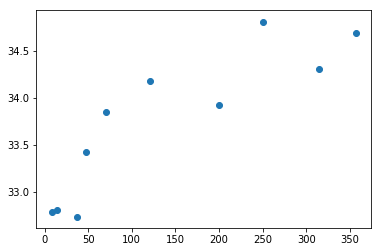

In [12]:
plt.scatter(dists,temp_maxs,)

观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

首先使用numpy：把列表转换为numpy数组，用于后续计算。

分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据

In [13]:
np_dists = np.array(dists)
np_temp_maxs = np.array(temp_maxs)

In [60]:
near_dists = dists[np_dists < 100]
near_data =city_data.merge(near_dists,on='dist',right_index=True)[['dist','temp_max']]

In [61]:
far_dists = dists[np_dists > 50]
far_data = city_data.merge(far_dists,on='dist',right_index=True)[['dist','temp_max']]

使用支持向量机计算回归参数

In [44]:
from sklearn.svm import SVR

In [45]:
# support vector machine

In [62]:
near_dist_values = near_data['dist'].values
near_temp_max_values = near_data['temp_max'].values
far_dist_values = far_data['dist'].values
far_temp_max_values = far_data['temp_max'].values

In [71]:
# 创建算法near_data
svr_near = SVR(kernel='linear')
svr_near.fit(near_dist_values.reshape(-1, 1),near_temp_max_values)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
# 预测
x_test_near = np.linspace(0,100,100).reshape(-1,1)
y_near = svr_near.predict(x_test_near)
y_near

array([32.55539683, 32.57239218, 32.58938753, 32.60638288, 32.62337823,
       32.64037358, 32.65736893, 32.67436428, 32.69135963, 32.70835498,
       32.72535033, 32.74234568, 32.75934103, 32.77633638, 32.79333173,
       32.81032708, 32.82732243, 32.84431778, 32.86131313, 32.87830848,
       32.89530383, 32.91229918, 32.92929453, 32.94628988, 32.96328523,
       32.98028058, 32.99727593, 33.01427128, 33.03126663, 33.04826198,
       33.06525734, 33.08225269, 33.09924804, 33.11624339, 33.13323874,
       33.15023409, 33.16722944, 33.18422479, 33.20122014, 33.21821549,
       33.23521084, 33.25220619, 33.26920154, 33.28619689, 33.30319224,
       33.32018759, 33.33718294, 33.35417829, 33.37117364, 33.38816899,
       33.40516434, 33.42215969, 33.43915504, 33.45615039, 33.47314574,
       33.49014109, 33.50713644, 33.52413179, 33.54112714, 33.55812249,
       33.57511785, 33.5921132 , 33.60910855, 33.6261039 , 33.64309925,
       33.6600946 , 33.67708995, 33.6940853 , 33.71108065, 33.72

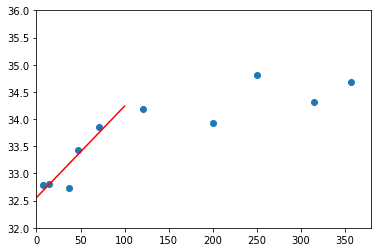

In [82]:
plt.scatter(np_dists,np_temp_maxs)
plt.axis((0,380,32,36))
plt.plot(x_test_near,y_near,c='r')

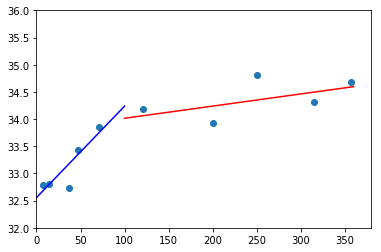

In [84]:
svr_far = SVR(kernel='linear')
svr_far.fit(far_dist_values.reshape(-1, 1),far_temp_max_values)
x_test_far = np.linspace(100,360,100).reshape(-1,1)
y_far = svr_far.predict(x_test_far)
plt.scatter(np_dists,np_temp_maxs)
plt.axis((0,380,32,36))
plt.plot(x_test_near,y_near,c='b')
plt.plot(x_test_far,y_far,c='r')

查看最低温度与海洋距离的关系

In [16]:
dists = city_data[['dist']]
temp_mins = city_data[['temp_min']]

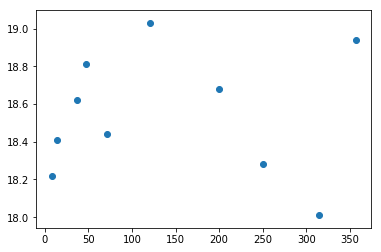

In [98]:
plt.scatter(dists,temp_mins)

最低湿度与海洋距离的关系

In [18]:
city_data.info

<bound method DataFrame.info of           dist  temp_min  humidity_min  temp_max  humidity_max
city                                                          
Asti       315     18.01            29     34.31            93
Bologna     71     18.44            40     33.85            92
Cesena      14     18.41            61     32.81           100
Faenza      37     18.62            61     32.74           100
Ferrara     47     18.81            39     33.43            85
Mantova    121     19.03            28     34.18           100
Milano     250     18.28            35     34.81           100
Piacenza   200     18.68            35     33.92           100
Ravenna      8     18.22            34     32.79            94
Torino     357     18.94            45     34.69            88>

In [19]:
dists = city_data[['dist']]
humidity_mins = city_data[['humidity_min']]

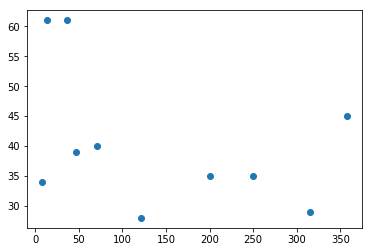

In [20]:
plt.scatter(dists,humidity_mins)

最高湿度与海洋距离的关系

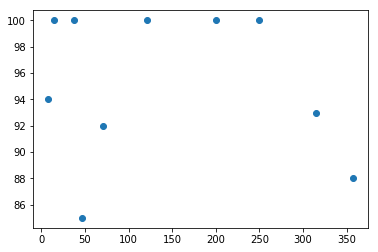

In [21]:
dists = city_data[['dist']]
humidity_maxs = city_data[['humidity_max']]
plt.scatter(dists,humidity_maxs,)

平均湿度与海洋距离的关系

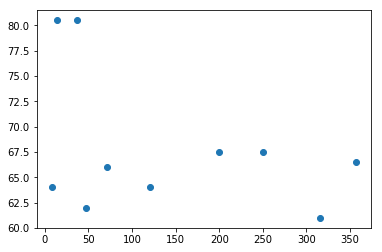

In [22]:
dists = city_data[['dist']]
humidity_mean = (city_data['humidity_min'] + city_data['humidity_max']) / 2
plt.scatter(dists,humidity_mean,)

思考：模仿最高温度，得到平均湿度与海洋距离的回归曲线

风向与风速的关系

In [23]:
data_all.head()

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,28.05,66,1014.0,Sky is Clear,1436863176,2.57,42.501,Asti,2015-07-14 10:39:36,315
1,29.51,64,1014.0,Sky is Clear,1436866759,1.54,263.000,Asti,2015-07-14 11:39:19,315
2,30.39,58,1017.0,Sky is Clear,1436870510,2.60,100.000,Asti,2015-07-14 12:41:50,315
3,31.10,54,1017.0,Sky is Clear,1436874098,2.10,90.000,Asti,2015-07-14 13:41:38,315
4,33.23,45,1016.0,few clouds,1436877645,2.10,120.000,Asti,2015-07-14 14:40:45,315


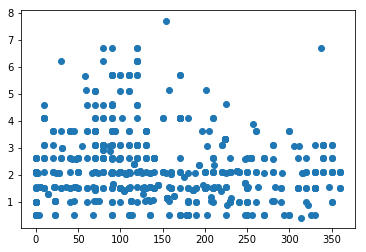

In [24]:
wind_speeds = data_all['wind_speed']
wind_degs = data_all['wind_deg']
plt.scatter(wind_degs,wind_speeds)

在子图中，同时比较风向与湿度和风力的关系

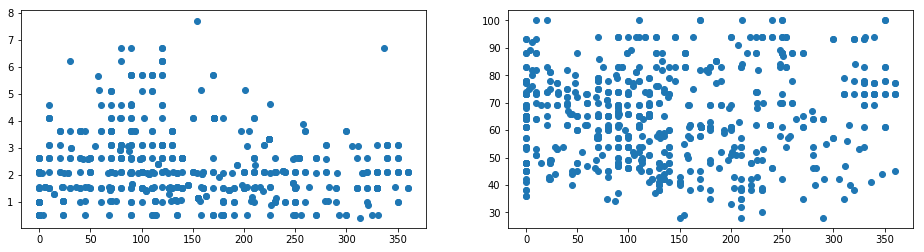

In [99]:
plt.figure(figsize=(8*2,4))
axes1 = plt.subplot(1,2,1)
axes1.scatter(data_all['wind_deg'],data_all['wind_speed'])
axes2 = plt.subplot(1,2,2)
axes2.scatter(data_all['wind_deg'],data_all['humidity'])

可以看到散点图显示效果不好

由于风向是360度，我们可以考虑使用玫瑰图（极坐标条形图）

首先自定义一个画图函数

In [156]:
def city_wind_deg(degree,ranges):
    plt.axes([0.,0.,1.5,1.5], polar=True, facecolor='w')
    ranges = np.arange(0,2*np.pi,2*np.pi/8)
    colors = np.random.rand(8,3)
    plt.bar(ranges, degree, color=colors,width = 2*np.pi/8)
    plt.title('city_wind_deg')

用numpy创建一个直方图，将360度划分为8个面元，将数据分类到这8个面元中

In [140]:
degree, ranges = np.histogram(data_all['wind_deg'], bins=8, range=[0,360])
display(degree, ranges)

array([126,  88, 161,  86,  72,  58,  31,  53], dtype=int64)

array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360.])

<BarContainer object of 8 artists>

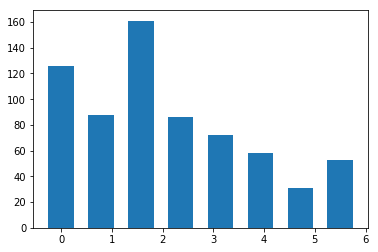

In [141]:
ranges = np.arange(0,2*np.pi,2*np.pi/8)
plt.bar(ranges, height= degree,width=0.5)

计算米兰各个方向上的风速

In [128]:
pd.unique(data_all['city'])

array(['Asti', 'Bologna', 'Cesena', 'Faenza', 'Ferrara', 'Mantova',
       'Milano', 'Piacenza', 'Ravenna', 'Torino'], dtype=object)

In [142]:
milan_wind_deg = data_all[data_all['city']=='Milano']
milan_wind_deg.head()

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
407,28.57,54,1016.0,Sky is Clear,1436863175,2.1,100.0,Milano,2015-07-14 10:39:35,250
408,29.74,48,1016.0,Sky is Clear,1436866758,2.6,0.0,Milano,2015-07-14 11:39:18,250
409,31.12,48,1016.0,Sky is Clear,1436870509,2.6,140.0,Milano,2015-07-14 12:41:49,250
410,32.16,45,1015.0,Sky is Clear,1436874098,2.1,0.0,Milano,2015-07-14 13:41:38,250
411,33.59,43,1015.0,Sky is Clear,1436877644,3.1,80.0,Milano,2015-07-14 14:40:44,250


In [153]:
milan_wind_speed = milan_wind_deg.groupby(['wind_deg'])[['wind_speed']].mean()
milan_wind_speed

,wind_speed
wind_deg,
0.0,1.406667
10.0,3.050000
20.0,2.100000
30.0,3.600000
40.0,2.600000
50.0,2.600000
60.0,1.500000
70.0,1.866667
80.0,2.575000


将各个方向的风速保存在列表中

In [154]:
degree, ranges = np.histogram(milan_wind_deg['wind_deg'], bins=8, range=[0,360])
display(degree, ranges)

array([21,  9,  9,  6, 14,  3,  2,  2], dtype=int64)

array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360.])

画出各个方向的风速

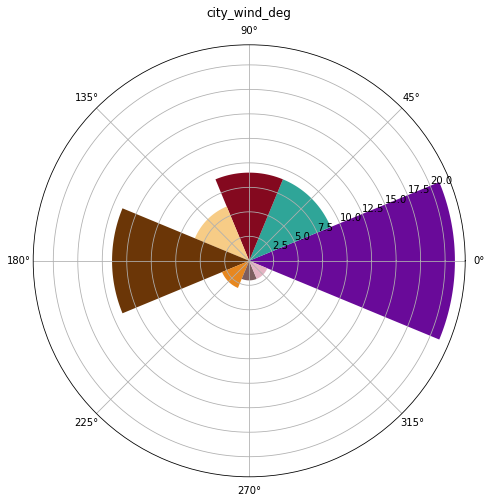

In [157]:
city_wind_deg(degree,ranges)

将上面步骤写成函数

In [169]:
def city_wind_deg(city_name):
    city_wind_deg = data_all[data_all['city']== city_name]
    degree, ranges = np.histogram(city_wind_deg['wind_deg'], bins=8, range=[0,360])
    plt.axes([0.,0.,1.5,1.5], polar=True, facecolor='w')
    ranges = np.arange(0,2*np.pi,2*np.pi/8)
    colors = np.random.rand(8,3)
    plt.bar(ranges, degree, color=colors,width = 2*np.pi/8)
    plt.title('city_wind_deg')

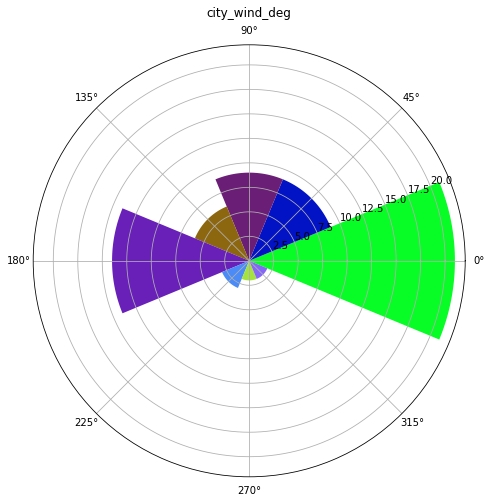

In [170]:
city_wind_deg('Milano')